<a href="https://colab.research.google.com/github/Volkovvpp/BSU_classic_ml/blob/main/Course_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
california_housing = fetch_california_housing(as_frame=True)

df = pd.DataFrame(california_housing.frame)

In [ ]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
df['MedHouseVal'].head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [ ]:
print(df.duplicated().sum())
print(df.isna().sum())

0
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


<Figure size 1200x1000 with 0 Axes>

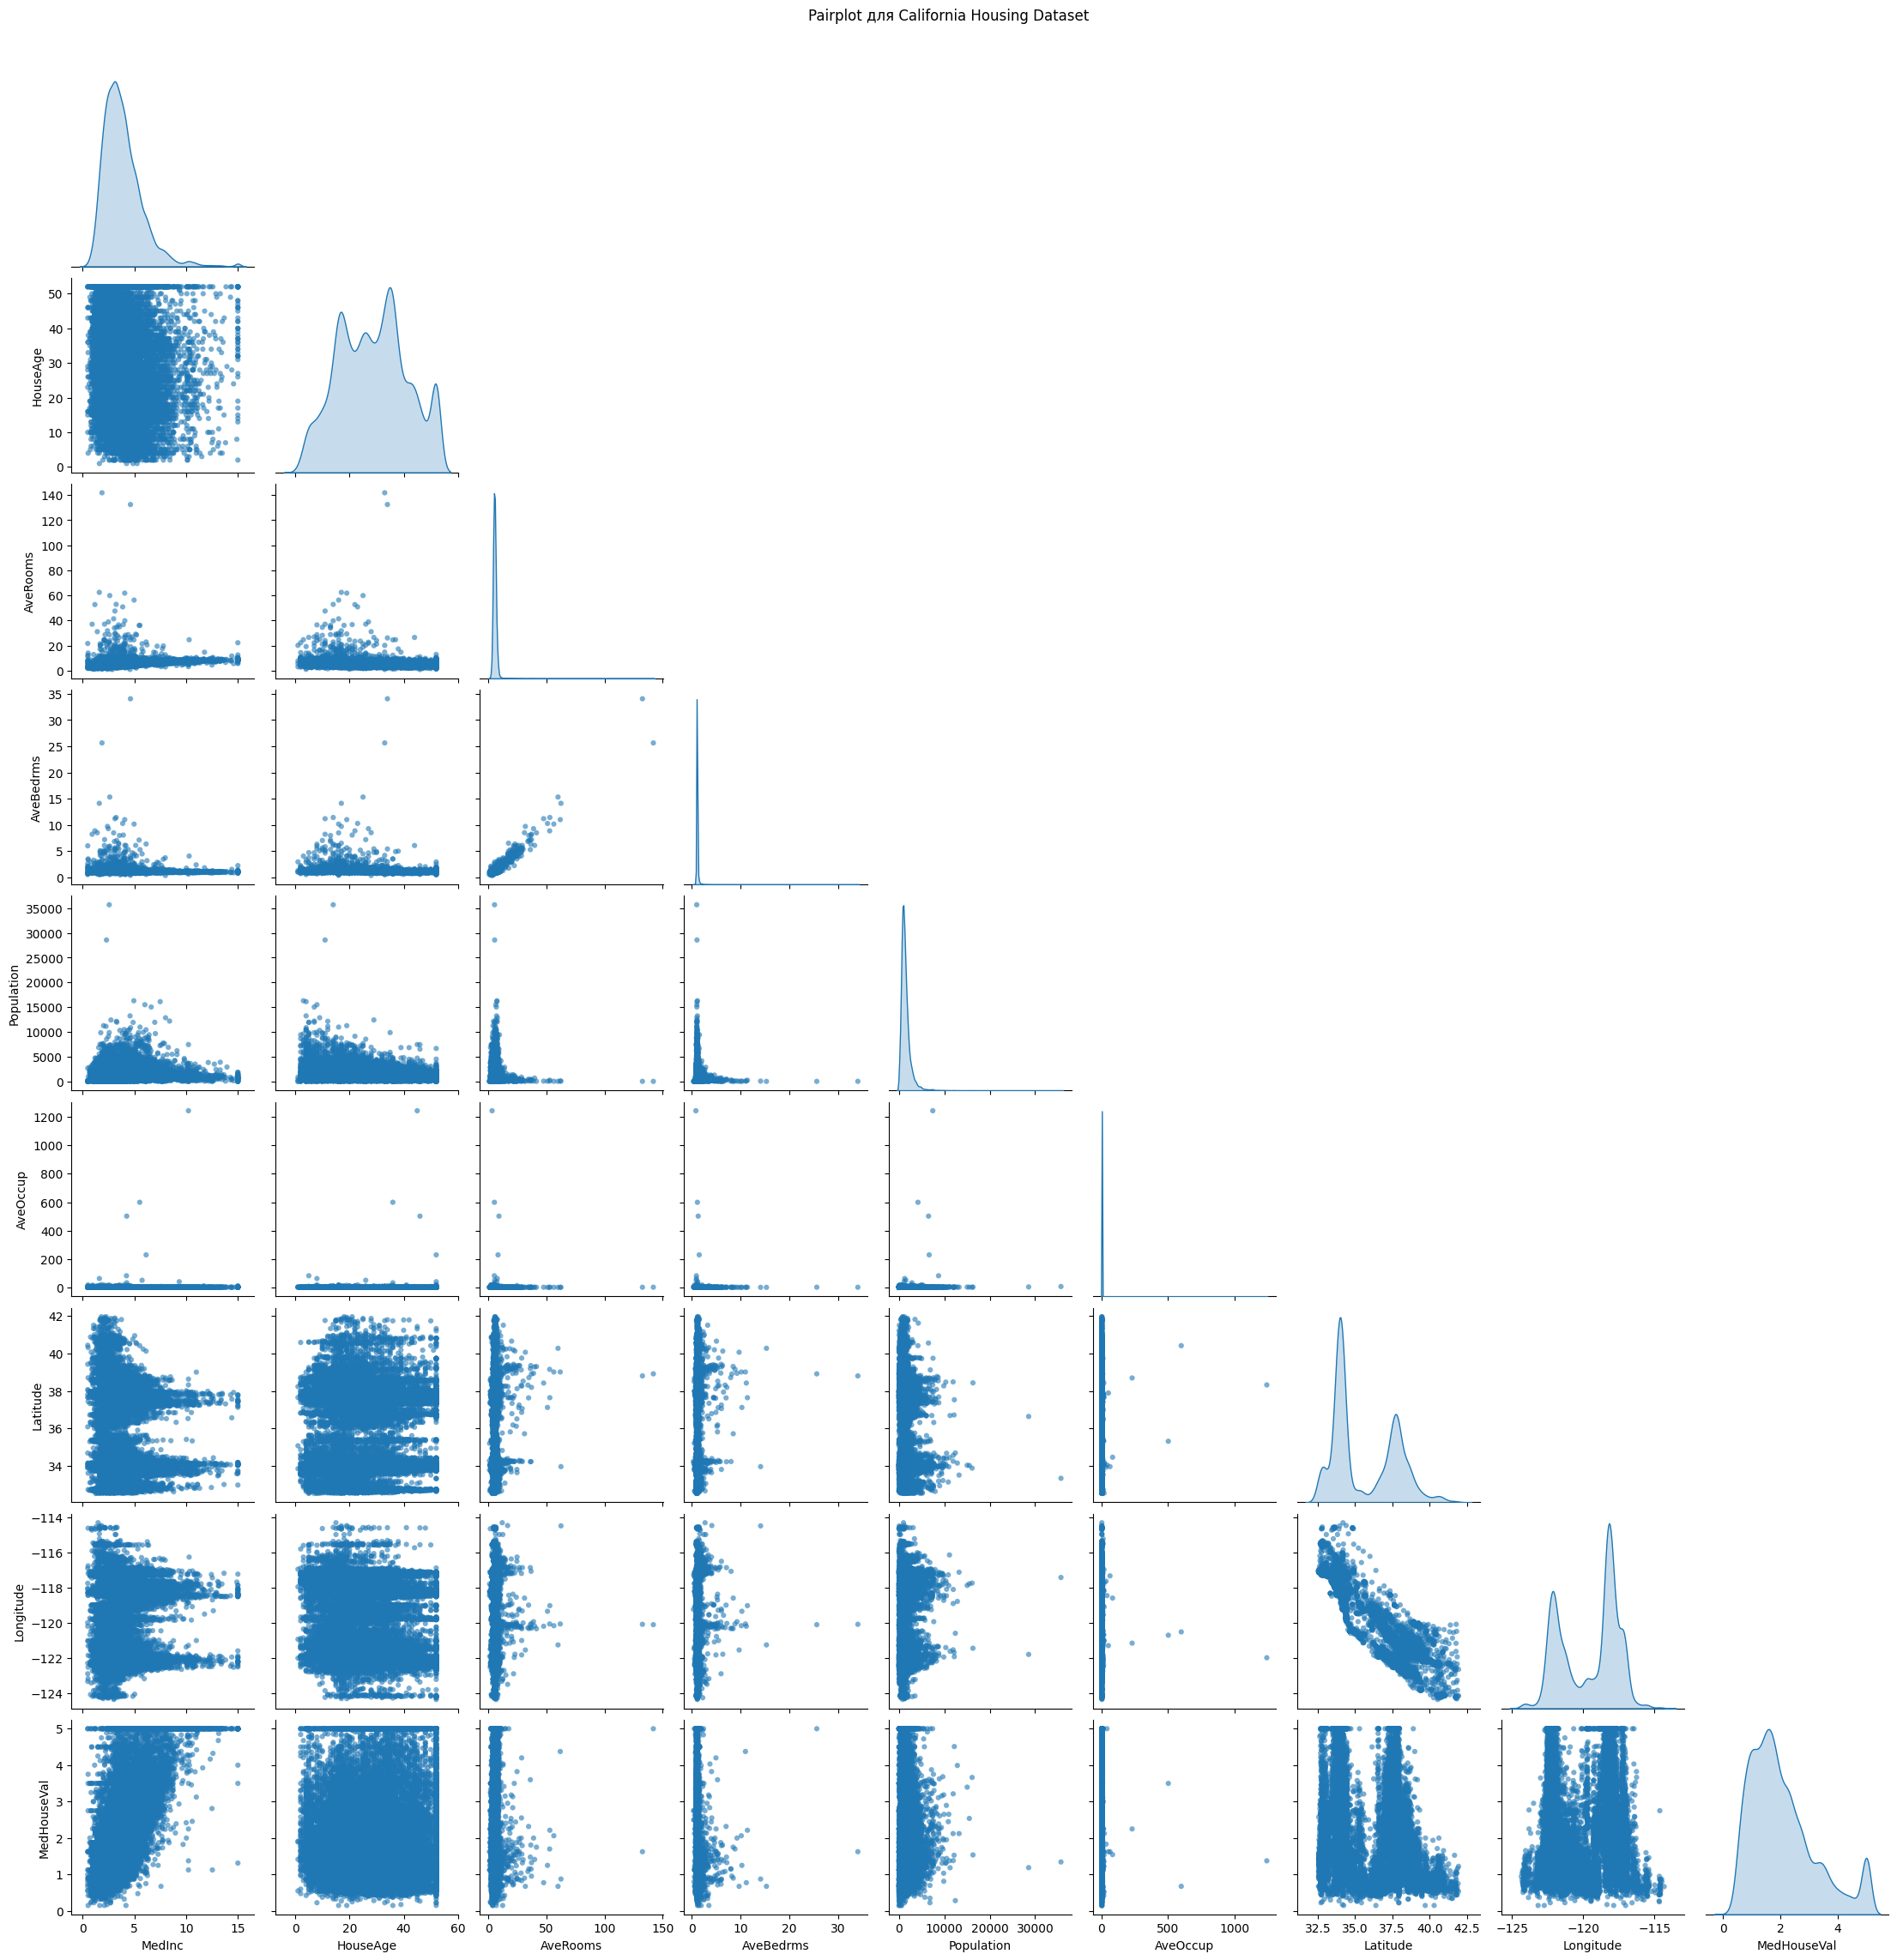

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.pairplot(
    df,
    kind="scatter",
    diag_kind="kde",
    plot_kws=dict(alpha=0.6, s=20, edgecolor="none"),
    corner=True,
)
plt.suptitle("Pairplot для California Housing Dataset", y=1.02)
plt.show()

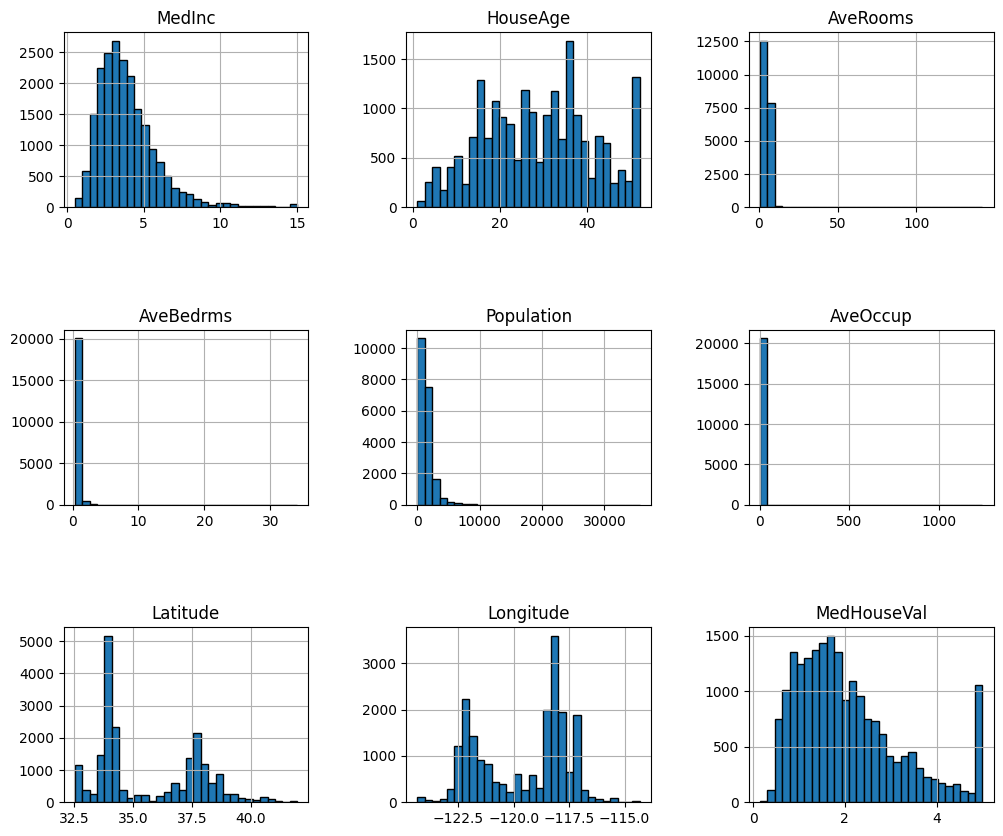

In [ ]:
df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

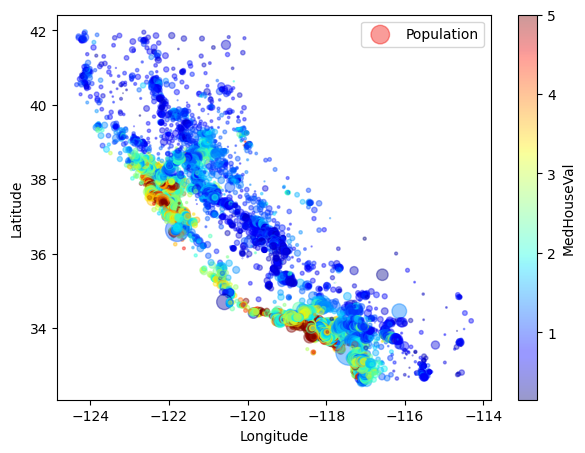

In [ ]:
df.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4,
             s=df["Population"]/100, label="Population", figsize=(7,5),
             c="MedHouseVal", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend()

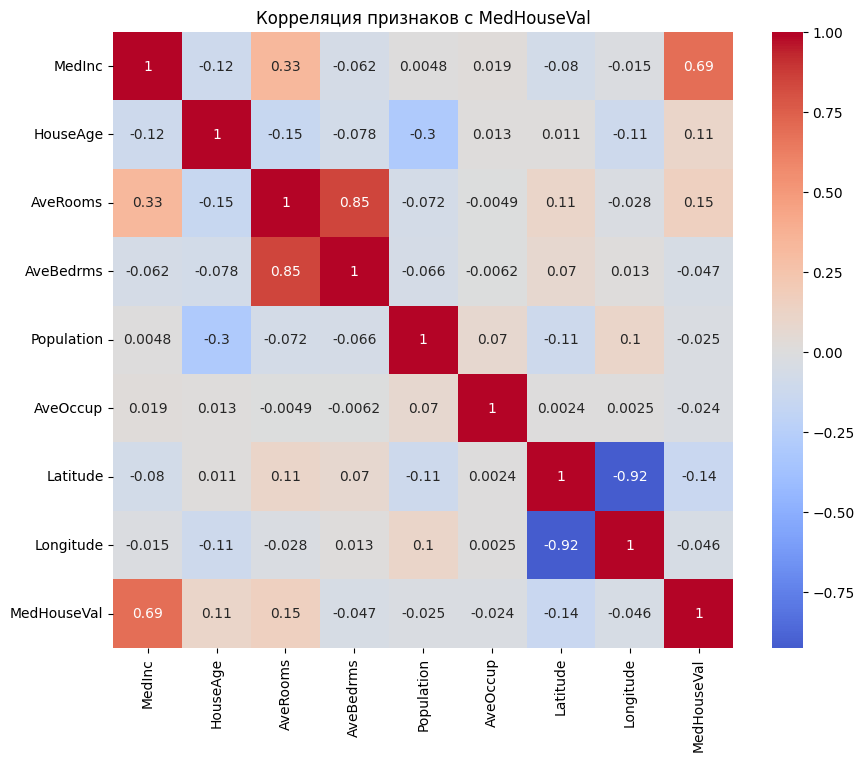

In [ ]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Корреляция признаков с MedHouseVal')
plt.show()

In [ ]:
selected_features = ['MedInc', 'HouseAge', 'AveRooms', 'Latitude', 'Longitude']
selected_cols = ['MedInc', 'HouseAge', 'AveRooms', 'Latitude', 'Longitude']

features = df.drop('MedHouseVal', axis=1)

X = df[selected_features]
y = df['MedHouseVal']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled_X = pd.DataFrame(scaler.fit_transform(X), columns=selected_cols)
df_scaled_X.head()

,MedInc,HouseAge,AveRooms,Latitude,Longitude
0,2.344766,0.982143,0.628559,1.052548,-1.327835
1,2.332238,-0.607019,0.327041,1.043185,-1.322844
2,1.782699,1.856182,1.155620,1.038503,-1.332827
3,0.932968,1.856182,0.156966,1.038503,-1.337818
4,-0.012881,1.856182,0.344711,1.038503,-1.337818


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_scaled_X,
    y,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

def evaluate_mestrics(y_test, predicted):
  mse_lr = mean_squared_error(y_test, predicted)
  r_mse_lr = root_mean_squared_error(y_test, predicted)
  r2 = r2_score(y_test, predicted)
  mae = mean_absolute_error(y_test, predicted)

  print(f"MSE: {mse_lr:.4f}")
  print(f"RMSE: {r_mse_lr:.4f}")
  print(f"R2: {r2:.4f}")
  print(f"MAE: {mae:.4f}")

In [ ]:
from sklearn.linear_model import LinearRegression

linMod = LinearRegression()

linMod.fit(X_train, y_train)
lin_predicted = linMod.predict(X_test)

In [ ]:
print("Linear Regression metrics:")
evaluate_mestrics(y_test, lin_predicted)

Linear Regression metrics:
MSE: 0.5486
RMSE: 0.7407
R2: 0.5814
MAE: 0.5433


In [ ]:
from sklearn.tree import DecisionTreeRegressor

treeMod = DecisionTreeRegressor(max_depth=11)

treeMod.fit(X_train, y_train)
tree_predicted = treeMod.predict(X_test)

In [ ]:
print("Decision tree metrics:")
evaluate_mestrics(y_test, tree_predicted)

Decision tree metrics:
MSE: 0.4051
RMSE: 0.6365
R2: 0.6909
MAE: 0.4125


In [ ]:
from xgboost import XGBRegressor

xgbMod = XGBRegressor()

xgbMod.fit(X_train, y_train)
xgb_predicted = xgbMod.predict(X_test)

In [ ]:
print("XGBRegressor metrics:")
evaluate_mestrics(y_test, xgb_predicted)

XGBRegressor metrics:
MSE: 0.2281
RMSE: 0.4776
R2: 0.8259
MAE: 0.3181


In [ ]:
from sklearn.preprocessing import StandardScaler

X_nn = df.drop('MedHouseVal', axis=1)
y_nn = df['MedHouseVal']

scaler = StandardScaler()
df_scaled_X = pd.DataFrame(scaler.fit_transform(X_nn), columns=df.columns.drop('MedHouseVal'))

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y_nn.values.reshape(-1, 1)).flatten()

print(df_scaled_X.head())

     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  2.344766  0.982143  0.628559  -0.153758   -0.974429 -0.049597  1.052548   
1  2.332238 -0.607019  0.327041  -0.263336    0.861439 -0.092512  1.043185   
2  1.782699  1.856182  1.155620  -0.049016   -0.820777 -0.025843  1.038503   
3  0.932968  1.856182  0.156966  -0.049833   -0.766028 -0.050329  1.038503   
4 -0.012881  1.856182  0.344711  -0.032906   -0.759847 -0.085616  1.038503   

   Longitude  
0  -1.327835  
1  -1.322844  
2  -1.332827  
3  -1.337818  
4  -1.337818  


In [ ]:
from sklearn.model_selection import train_test_split

X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(
    df_scaled_X,
    y_scaled,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_nn.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Обучение модели
history = model.fit(
    X_train_nn,
    y_train_nn,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Предсказание и обратное масштабирование
y_pred_scaled = model.predict(X_test_nn).flatten()
y_pred_nn = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()  # Обратное преобразование


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.5319 - val_loss: 0.4531
Epoch 2/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3254 - val_loss: 0.3174
Epoch 3/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3259 - val_loss: 0.2899
Epoch 4/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2605 - val_loss: 0.2736
Epoch 5/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2460 - val_loss: 0.2609
Epoch 6/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2377 - val_loss: 0.2598
Epoch 7/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2349 - val_loss: 0.2883
Epoch 8/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2632 - val_loss: 0.2660
Epoch 9/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2593 - val_loss: 0.2509
Epoch 10/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2241 - val_loss: 0.2414
Epoch 11/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2248 - val_loss: 0.2379
Epoch 12/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.

In [ ]:
print("Neural network metrics:")
evaluate_mestrics(y_test, y_pred_nn)

Neural network metrics:
MSE: 0.2803
RMSE: 0.5294
R2: 0.7861
MAE: 0.3563


Text(0, 0.5, 'Predictions')

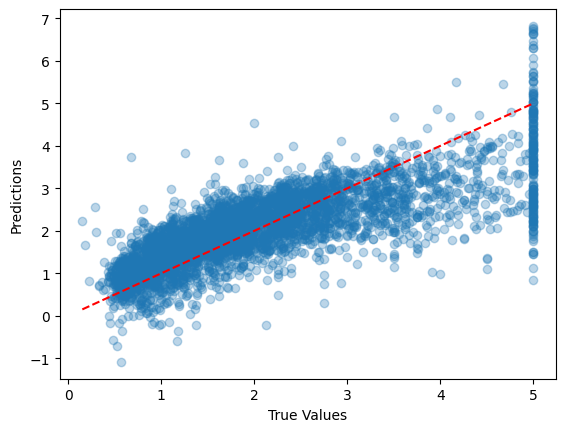

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, lin_predicted, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predictions')